In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [85]:
data=pd.read_csv(r"players_20.csv")

# Basic Checks

In [87]:
pd.set_option('display.max_columns',None)

In [88]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [89]:
data.shape

(18278, 104)

In [90]:
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   18278 non-null  int64  
 1    player_url                  18278 non-null  object 
 2    short_name                  18278 non-null  object 
 3    long_name                   18278 non-null  object 
 4    age                         18278 non-null  int64  
 5    dob                         18278 non-null  object 
 6    height_cm                   18278 non-null  int64  
 7    weight_kg                   18278 non-null  int64  
 8    nationality                 18278 non-null  object 
 9    club                        18278 non-null  object 
 10   overall                     18278 non-null  int64  
 11   potential                   18278 non-null  int64  
 12   value_eur                   18278 non-null  int64  
 13   wage_eur      

In [91]:
#There is missing values

In [92]:
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [93]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [94]:
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,1499,18038,1048,16990,1126,7566,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,2,83,29,316,1760,26,921,94,94,94,107,103,103,103,107,103,103,103,100,88,88,88,100,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,No,#Strength,SUB,Sassuolo,2019-07-01,SUB,Early Crosser,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,16310,514,7820,17,1465,587,501,725,725,725,736,727,727,727,736,748,748,748,809,775,775,775,809,682,636,636,636,682,667,621,621,621,667


# EDA

In [96]:
#Sort the data based on overall rate to get top 10 players
#Here the overall rate is already sorted
fifa_overall=data.sort_values(by='overall',ascending=False)
#fifa_overall

In [97]:
data['nationality'].values

array(['Argentina', 'Portugal', 'Brazil', ..., 'China PR', 'China PR',
       'China PR'], dtype=object)

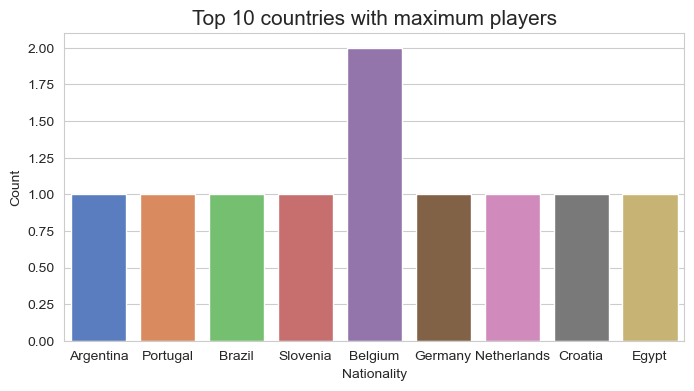

In [98]:
plt.figure(figsize=(8,4))
sns.countplot(x='nationality',data=fifa_overall.head(10),palette='muted')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Top 10 countries with maximum players',fontsize=15)
plt.show()

In [99]:
# Belgium country players are most in top 10

<Axes: xlabel='age', ylabel='overall'>

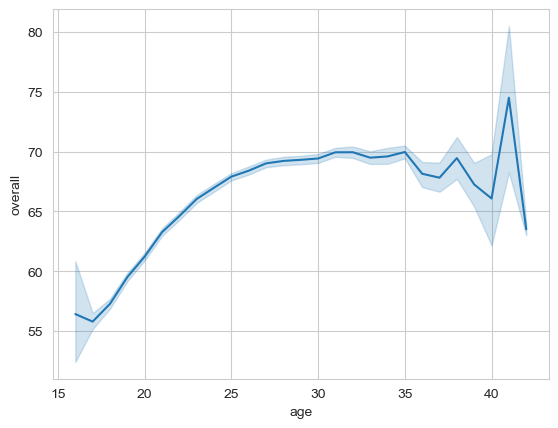

In [100]:
#plt.figure(figsize=(10,10))
sns.lineplot(x='age',y='overall',data=data)
#plt.show()

In [101]:
#  Players have  contineous improvements in their performance till the age of around 28,29 After this age they 
## stops improving their performance

In [102]:
data.team_position.value_counts()

team_position
SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [103]:
data_position=data[data['team_position'].isin(['ST','RS','LS'])]
data_position.shape

(848, 104)

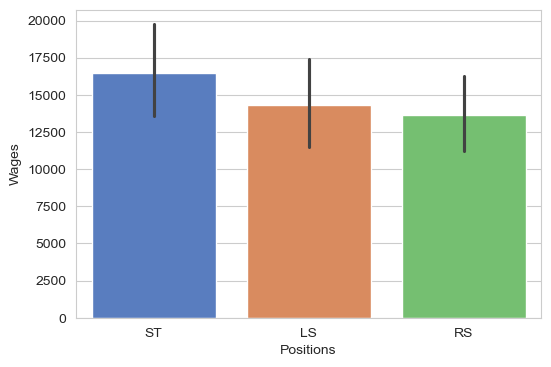

In [104]:
plt.figure(figsize=(6,4))
plt.xlabel('Positions')
plt.ylabel('Wages')
sns.barplot(x='team_position',y='wage_eur',data=data_position,palette='muted')
plt.show()

In [105]:
# Centre Striker get high wages

# Data Preprocessing

In [107]:
#Handling missing values
pd.set_option('display.max_rows',None)

In [108]:
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [109]:
columns=list(data.columns)
print (columns)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [110]:
#Drop the columns having large number of missing values and 

In [111]:
data.drop(['player_tags','loaned_from','nation_position','nation_jersey_number','gk_diving',
           'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits'],axis=1,inplace=True)

In [112]:
#Drop those columns which are not important and have null values
data.drop(['sofifa_id', 'player_url', 'short_name', 'long_name','dob','nationality', 'club',
           'player_positions','work_rate','body_type', 'real_face',
           'team_jersey_number', 'joined', 'contract_valid_until',
           'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 
           'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],axis=1,inplace=True)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   overall                     18278 non-null  int64  
 4   potential                   18278 non-null  int64  
 5   value_eur                   18278 non-null  int64  
 6   wage_eur                    18278 non-null  int64  
 7   preferred_foot              18278 non-null  object 
 8   international_reputation    18278 non-null  int64  
 9   weak_foot                   18278 non-null  int64  
 10  skill_moves                 18278 non-null  int64  
 11  release_clause_eur          16980 non-null  float64
 12  team_position               18038 non-null  object 
 13  pace                        162

In [114]:
data.preferred_foot.value_counts()

preferred_foot
Right    13960
Left      4318
Name: count, dtype: int64

In [115]:
data['preferred_foot'].replace({'Right':1,'Left':0},inplace=True)

In [116]:
data.preferred_foot.values

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [117]:
data.team_position.value_counts()

team_position
SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

In [118]:
label_encoder=preprocessing.LabelEncoder()
data['team_position']=label_encoder.fit_transform(data['team_position'])

In [119]:
data.team_position.value_counts()

team_position
28    7820
21    2958
5      662
8      660
18     660
17     560
7      560
27     458
19     411
9      411
23     399
12     398
0      311
20     244
10     242
29     240
24     195
13     195
2      181
14     162
25     161
1      100
4       76
26      58
15      58
16      23
6       23
22      19
11      19
3       14
Name: count, dtype: int64

In [120]:
data.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
release_clause_eur            1298
team_position                    0
pace                          2036
shooting                      2036
passing                       2036
dribbling                     2036
defending                     2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control  

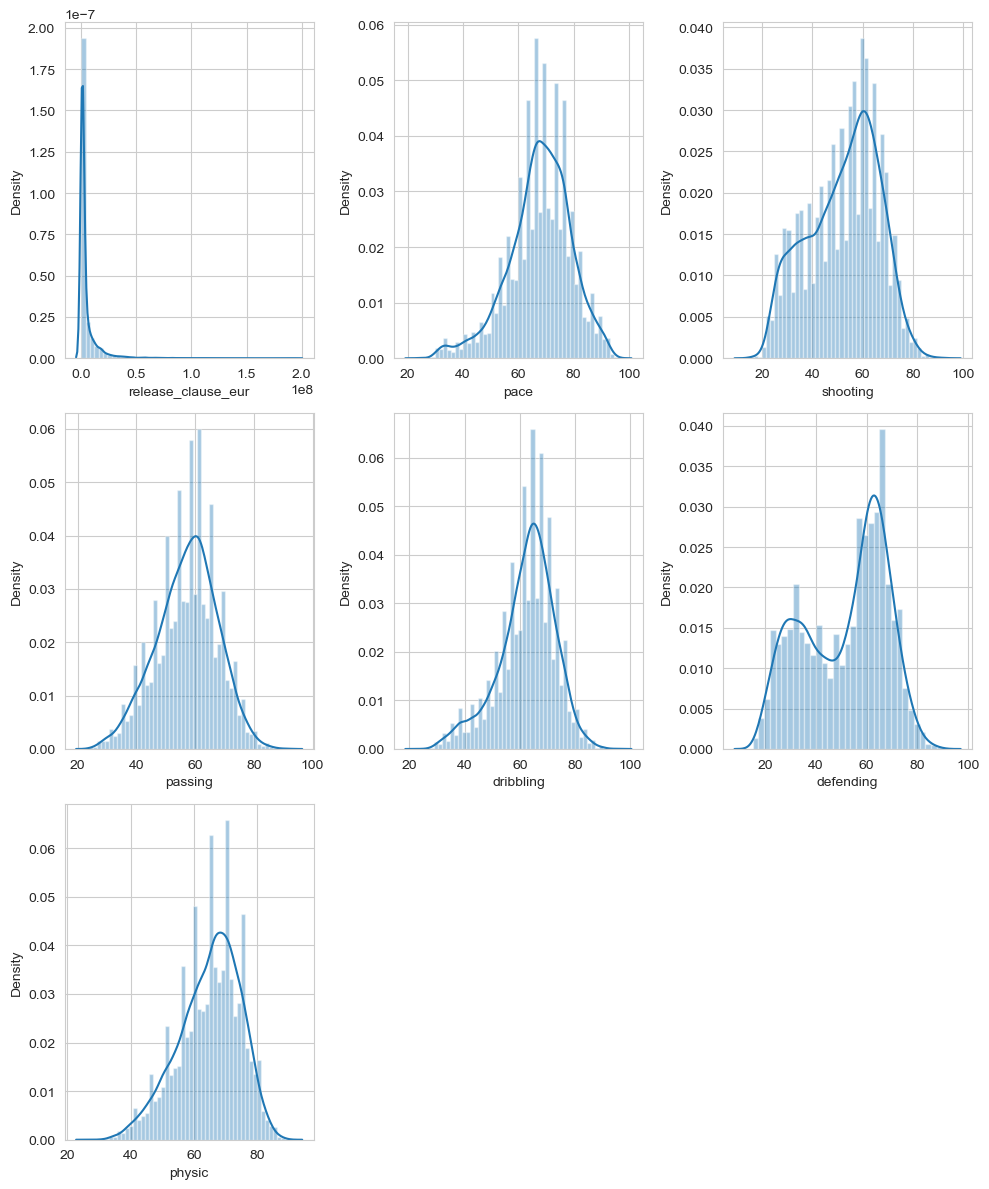

In [121]:
# Missing values corrections
data_missing=data[['release_clause_eur','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
plotno=1
plt.figure(figsize=(10,12))
for column in data_missing:
    plt.subplot(3,3,plotno)
    sns.distplot(x=data_missing[column],kde=True)
    plt.xlabel(column)
    plotno+=1
plt.tight_layout()
plt.show()

In [122]:
#'release_clause_eur','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic
# Data not following Normal Distribution. So use median here to fill null values
#data['release_clause_eur'].fillna(data['release_clause_eur'].median,inplace=True)
#data['pace'].fillna(data['pace'].median,inplace=True)
#data['shooting'].fillna(data['shooting'].median,inplace=True)
#data['passing'].fillna(data['passing'].median,inplace=True)
#data['dribbling'].fillna(data['dribbling'].median,inplace=True)
#data['defending'].fillna(data['defending'].median,inplace=True)
#data['physic'].fillna(data['physic'].median,inplace=True)


data.loc[data['release_clause_eur'].isnull()==True,'release_clause_eur']=data['release_clause_eur'].median()
data.loc[data['pace'].isnull()==True,'pace']=data['pace'].median()
data.loc[data['shooting'].isnull()==True,'shooting']=data['shooting'].median()
data.loc[data['passing'].isnull()==True,'passing']=data['passing'].median()
data.loc[data['dribbling'].isnull()==True,'dribbling']=data['dribbling'].median()
data.loc[data['defending'].isnull()==True,'defending']=data['defending'].median()
data.loc[data['physic'].isnull()==True,'physic']=data['physic'].median()

# Handling outliers

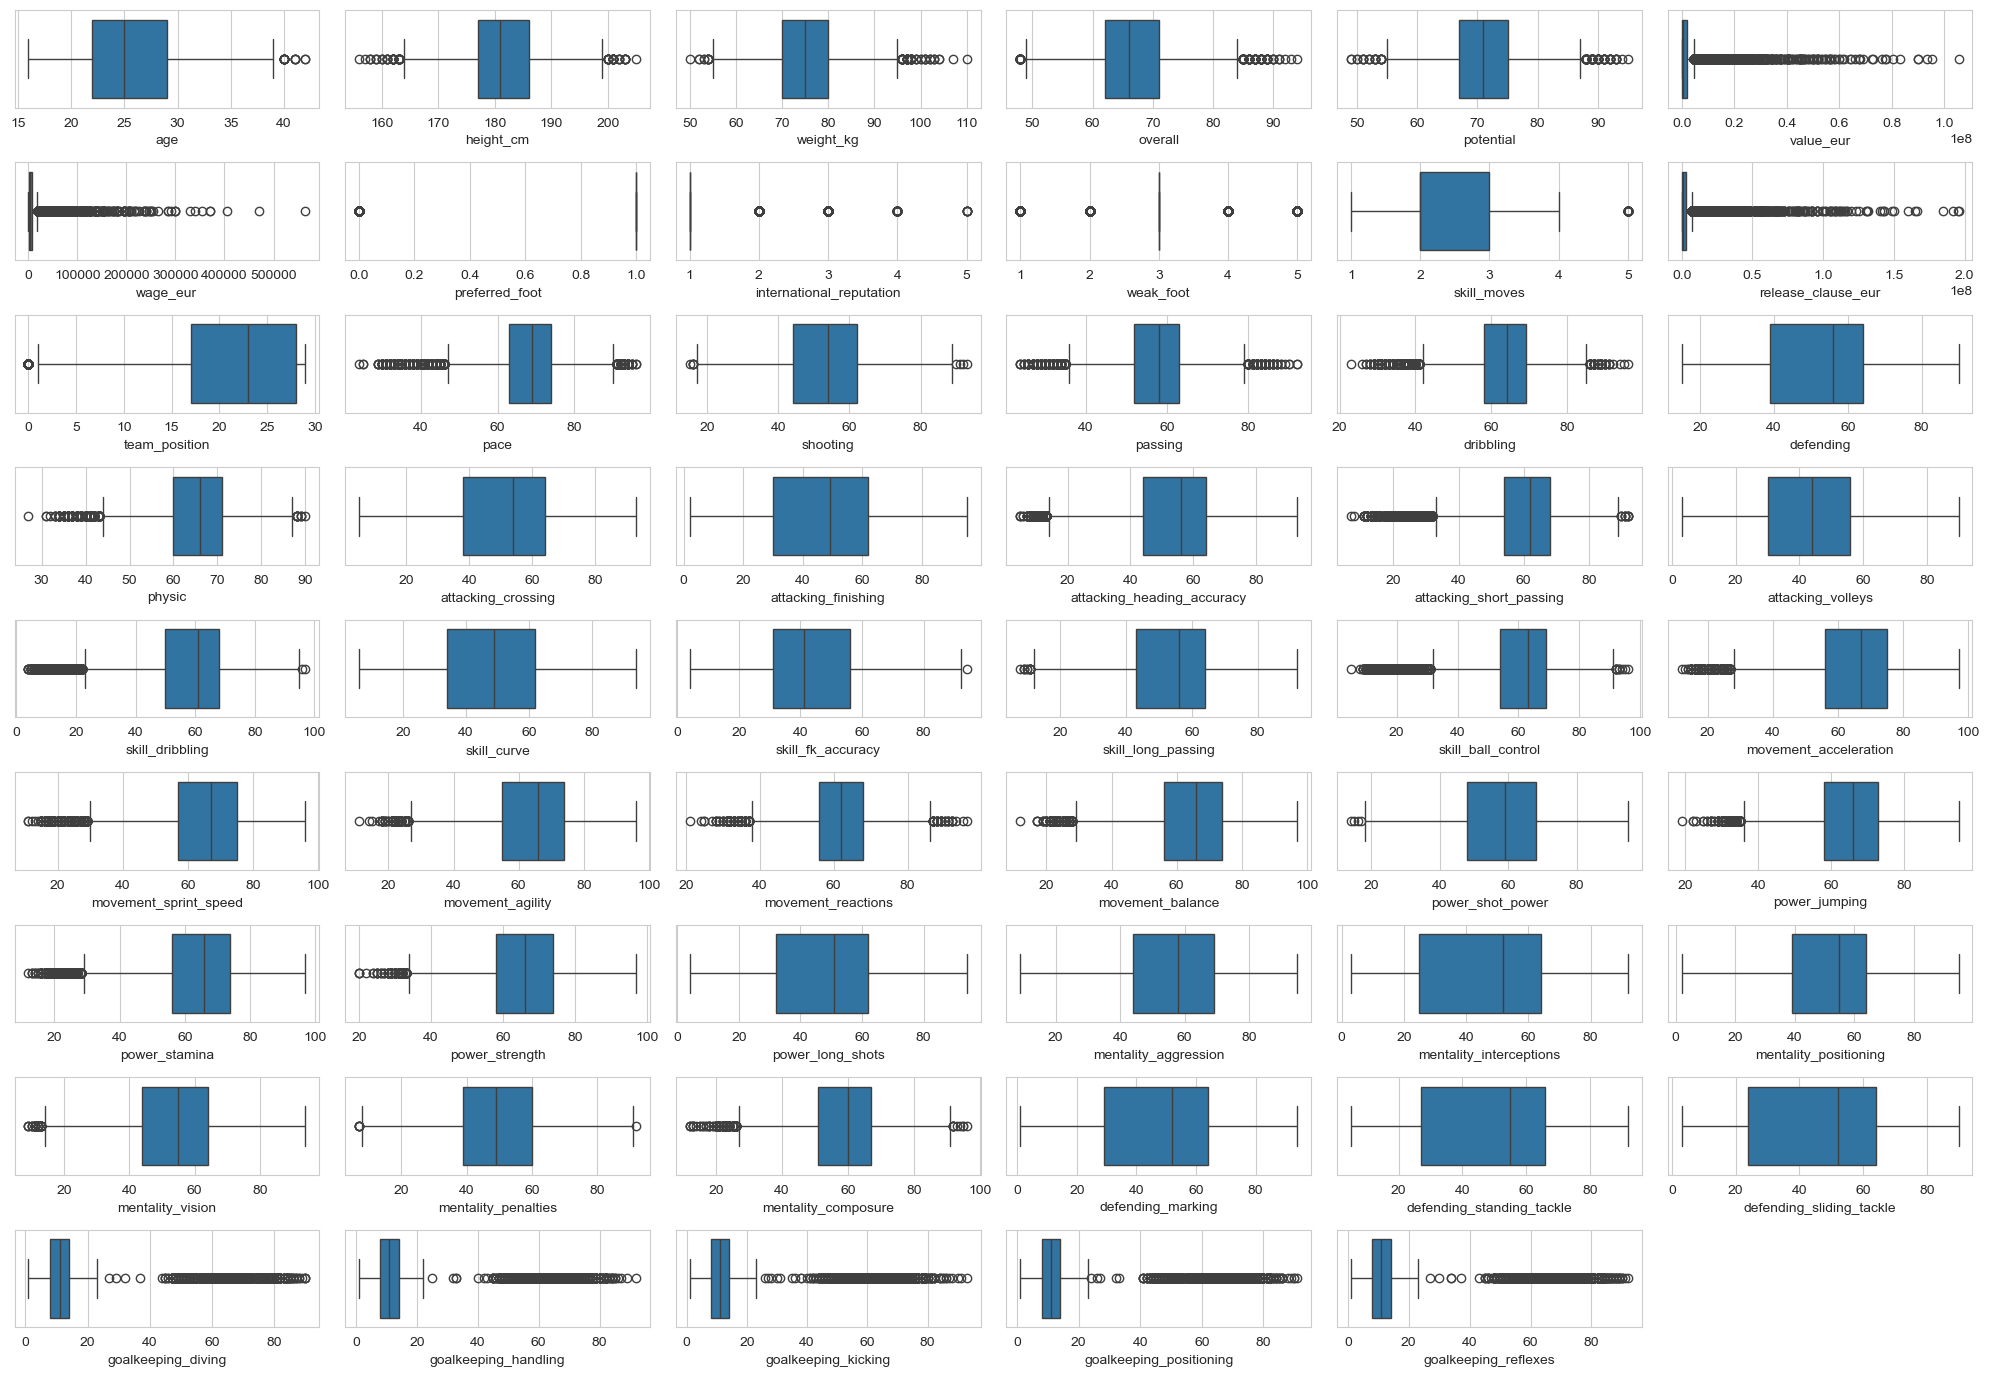

In [124]:
plt.figure(figsize=(20,15))
plotnum=1
for column in data:
    plt.subplot(10,6,plotnum)
    sns.boxplot(x=data[column])
    plotnum+=1
    plt.tight_layout()

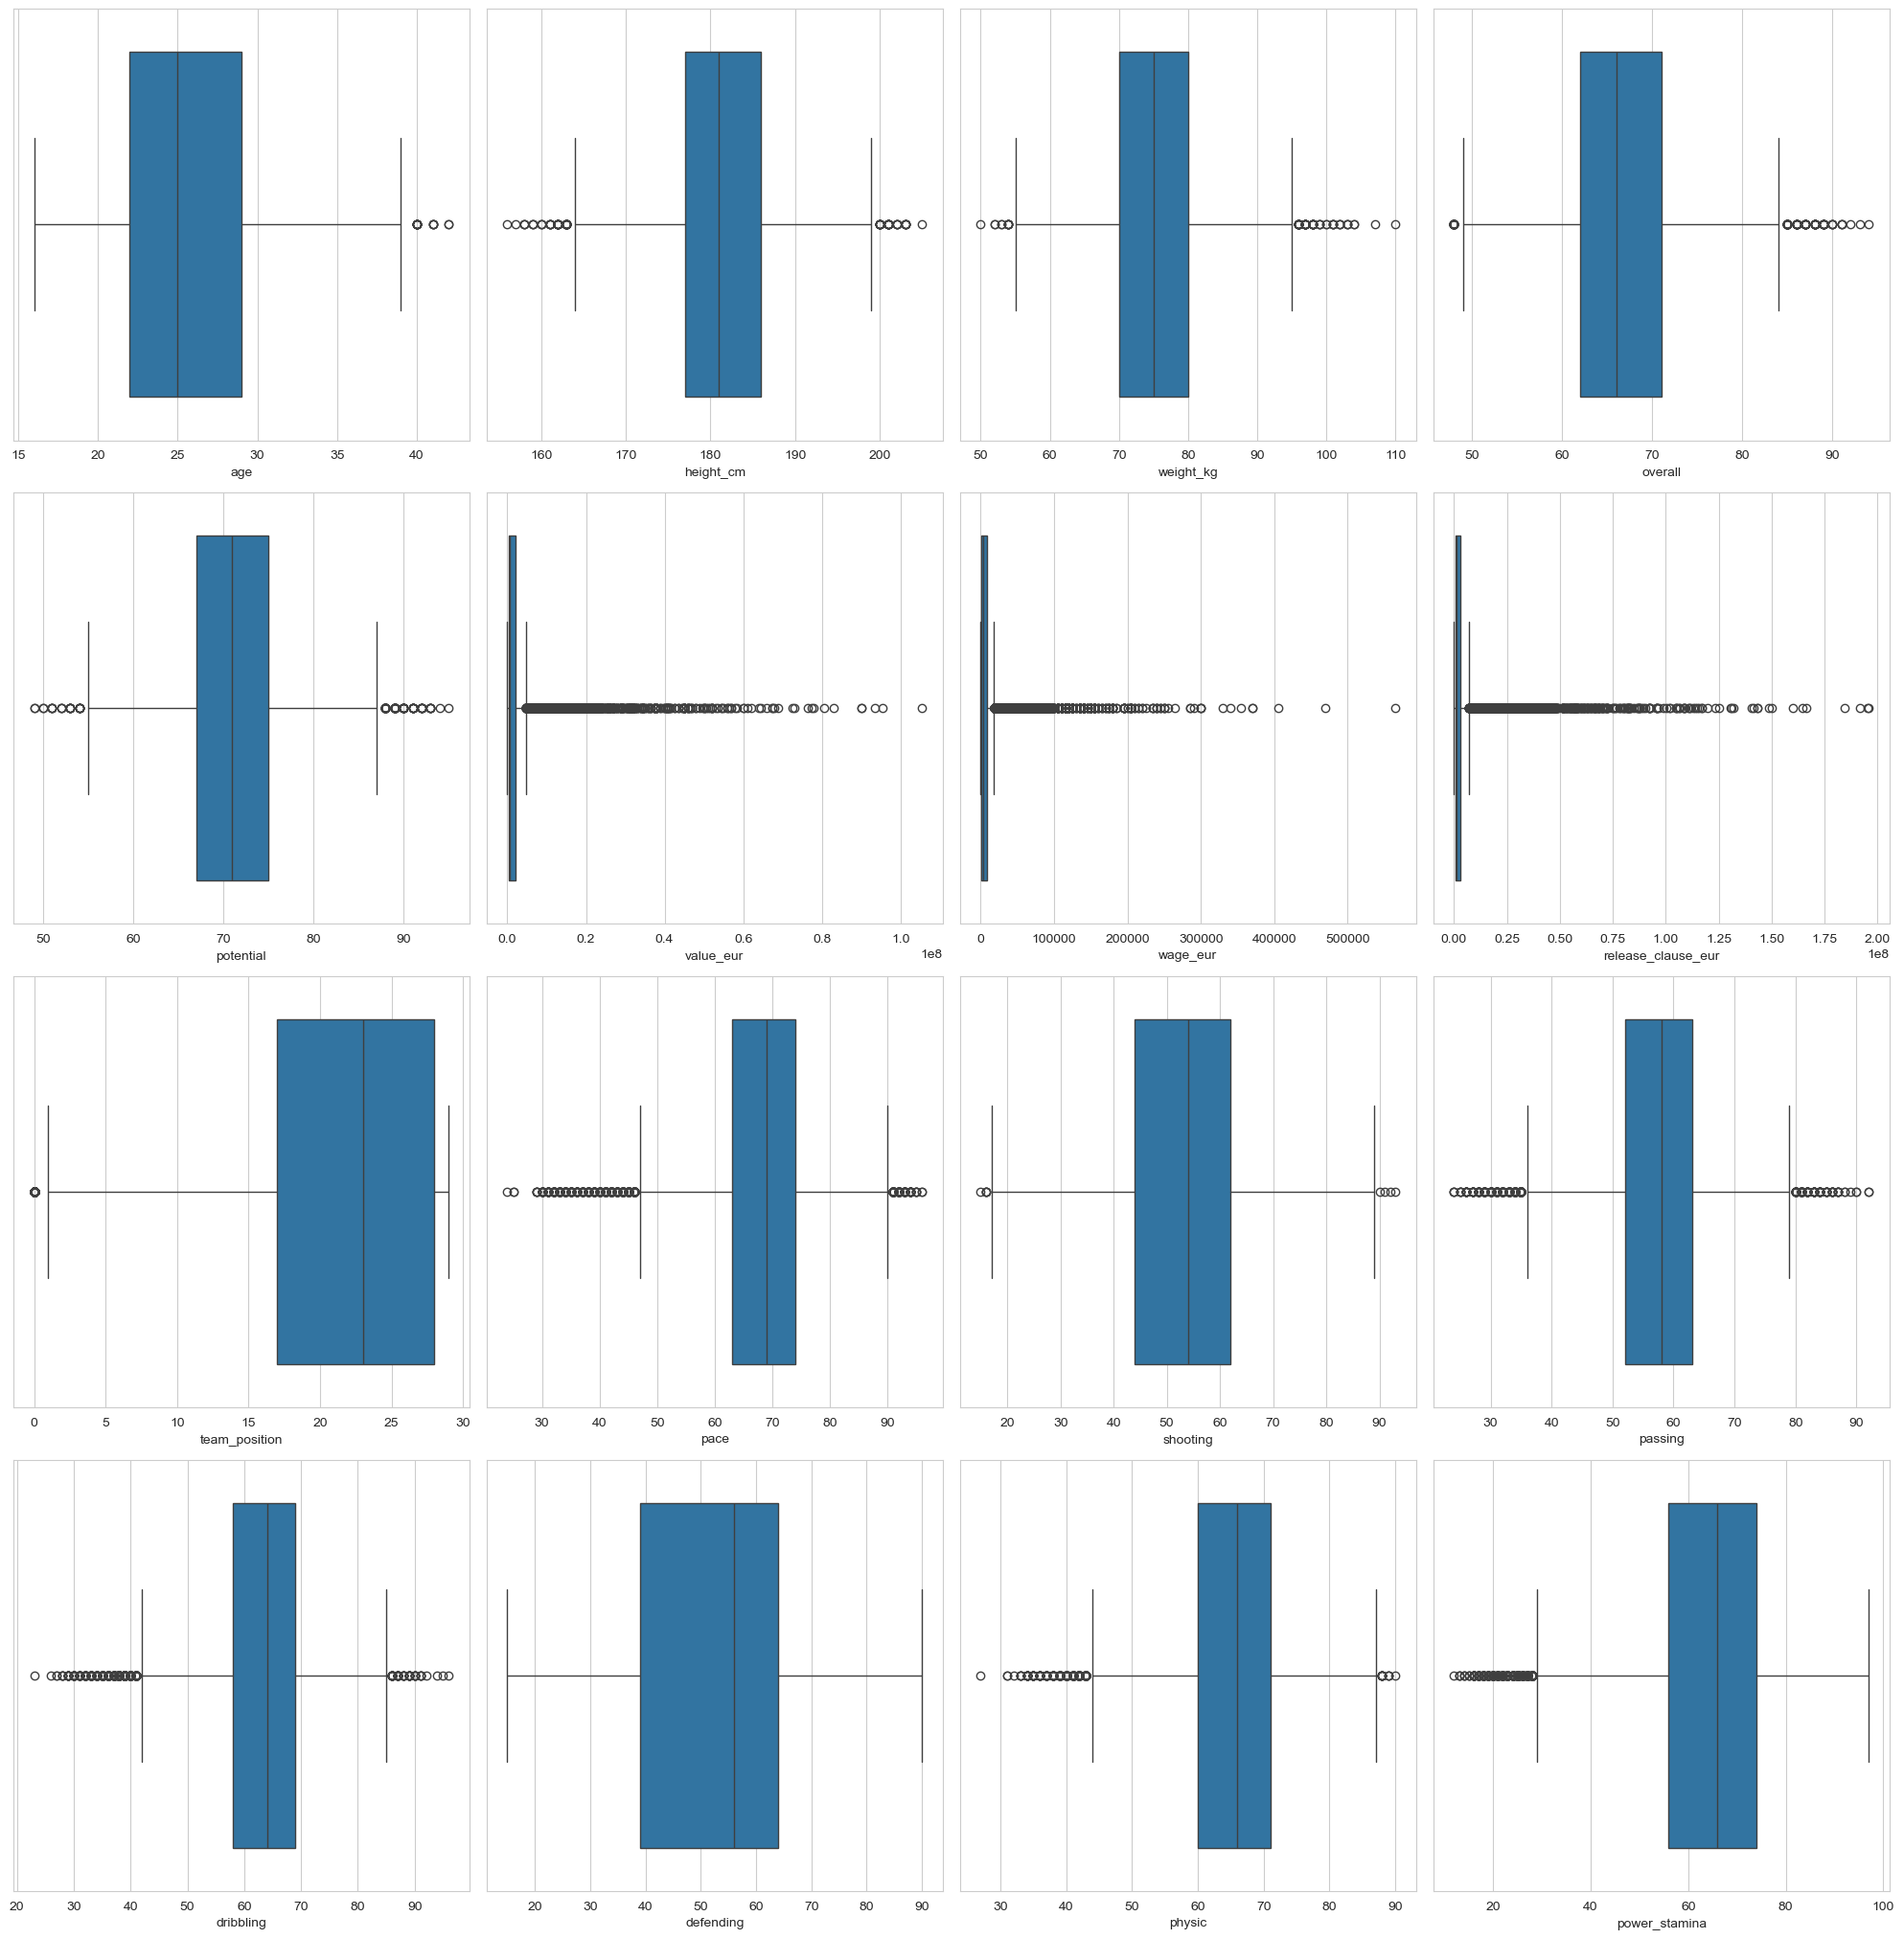

In [125]:
outl_correction=data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','team_position',
                  'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','power_stamina',]]

plt.figure(figsize=(20,25))
plotnum=1
for column in outl_correction:
    plt.subplot(5,4,plotnum)
    sns.boxplot(x=outl_correction[column])
    plotnum+=1
plt.tight_layout()
plt.show()

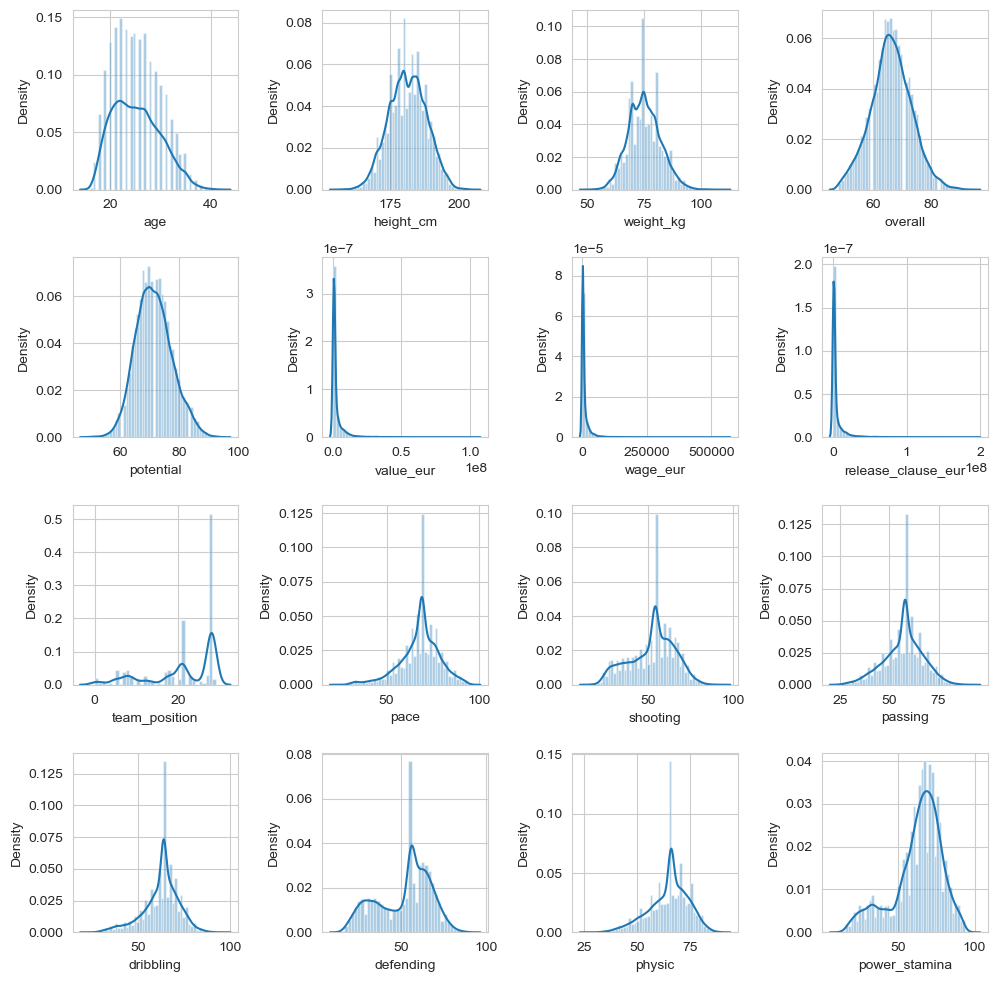

In [126]:
#Check the distribution to handle outliers
plotno=1
plt.figure(figsize=(10,12))
for column in outl_correction:
    plt.subplot(5,4,plotno)
    sns.distplot(x=outl_correction[column],kde=True)
    plt.xlabel(column)
    plotno+=1
plt.tight_layout()
plt.show()

In [127]:
#Here age,height,weight,overall,potential are slightly follow normal distribution.So,handle the outliers 
#with mean
#here we consider only the important features in outlier handling
data.loc[data['age']>39,'age']=np.mean(data['age'])
data.loc[data['height_cm']>199,'height_cm']=np.mean(data['height_cm'])
data.loc[data['height_cm']<168,'height_cm']=np.mean(data['height_cm'])

data.loc[data['weight_kg']>95,'weight_kg']=np.mean(data['weight_kg'])
data.loc[data['weight_kg']<55,'weight_kg']=np.mean(data['weight_kg'])

data.loc[data['overall']>79,'overall']=np.mean(data['overall'])
data.loc[data['overall']<51,'overall']=np.mean(data['overall'])

data.loc[data['potential']>87,'potential']=np.mean(data['potential'])
data.loc[data['potential']<55,'potential']=np.mean(data['potential'])

#'value_eur','wage_eur','release_clause_eur','team_position',
# 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','power_stamina' 
#are not following Normal Distribution,hence outlier handle with median

data.loc[data['value_eur']>75000000,'value_eur']=np.median(data['value_eur'])
data.loc[data['wage_eur']>180000,'wage_eur']=np.median(data['wage_eur'])
data.loc[data['release_clause_eur']>140000000,'release_clause_eur']=np.median(data['release_clause_eur'])

data.loc[data['team_position']<3,'team_position']=np.median(data['team_position'])

data.loc[data['pace']>88,'pace']=np.median(data['pace'])
data.loc[data['pace']<49,'pace']=np.median(data['pace'])

data.loc[data['shooting']<18,'shooting']=np.median(data['shooting'])
data.loc[data['shooting']>89,'shooting']=np.median(data['shooting'])

data.loc[data['passing']>78,'passing']=np.median(data['passing'])
data.loc[data['passing']<38,'passing']=np.median(data['passing'])

data.loc[data['dribbling']>81,'dribbling']=np.median(data['dribbling'])
data.loc[data['dribbling']<35,'dribbling']=np.median(data['dribbling'])

data.loc[data['physic']>86,'physic']=np.median(data['physic'])
data.loc[data['physic']<30,'physic']=np.median(data['physic'])

In [128]:
data.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32.0,170.0,72.0,66.244994,71.546887,700000,3000,0,5,4,4,1200000.0,25,87.0,54.0,58.0,64.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34.0,187.0,83.0,66.244994,71.546887,58500000,3000,1,5,4,5,96500000.0,14,69.0,54.0,58.0,64.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27.0,175.0,68.0,66.244994,71.546887,700000,3000,1,5,5,5,1200000.0,23,69.0,85.0,58.0,64.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26.0,188.0,87.0,66.244994,71.546887,700000,125000,1,3,3,1,1200000.0,5,69.0,54.0,58.0,64.0,56.0,66.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28.0,175.0,74.0,66.244994,71.546887,700000,3000,1,4,4,4,1200000.0,14,69.0,83.0,58.0,64.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [129]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur','release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]=scaler.fit_transform(data[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
                               'wage_eur','release_clause_eur', 'pace',
                               'shooting', 'passing', 'dribbling', 'defending', 'physic',
                               'attacking_crossing', 'attacking_finishing',
                               'attacking_heading_accuracy', 'attacking_short_passing',
                               'attacking_volleys', 'skill_dribbling', 'skill_curve',
                               'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                               'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                               'movement_reactions', 'movement_balance', 'power_shot_power',
                               'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                               'mentality_aggression', 'mentality_interceptions',
                               'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                               'mentality_composure', 'defending_marking', 'defending_standing_tackle',
                               'defending_sliding_tackle', 'goalkeeping_diving',
                               'goalkeeping_handling', 'goalkeeping_kicking',
                               'goalkeeping_positioning', 'goalkeeping_reflexes']])

In [130]:
data.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_position', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_slid

<Axes: >

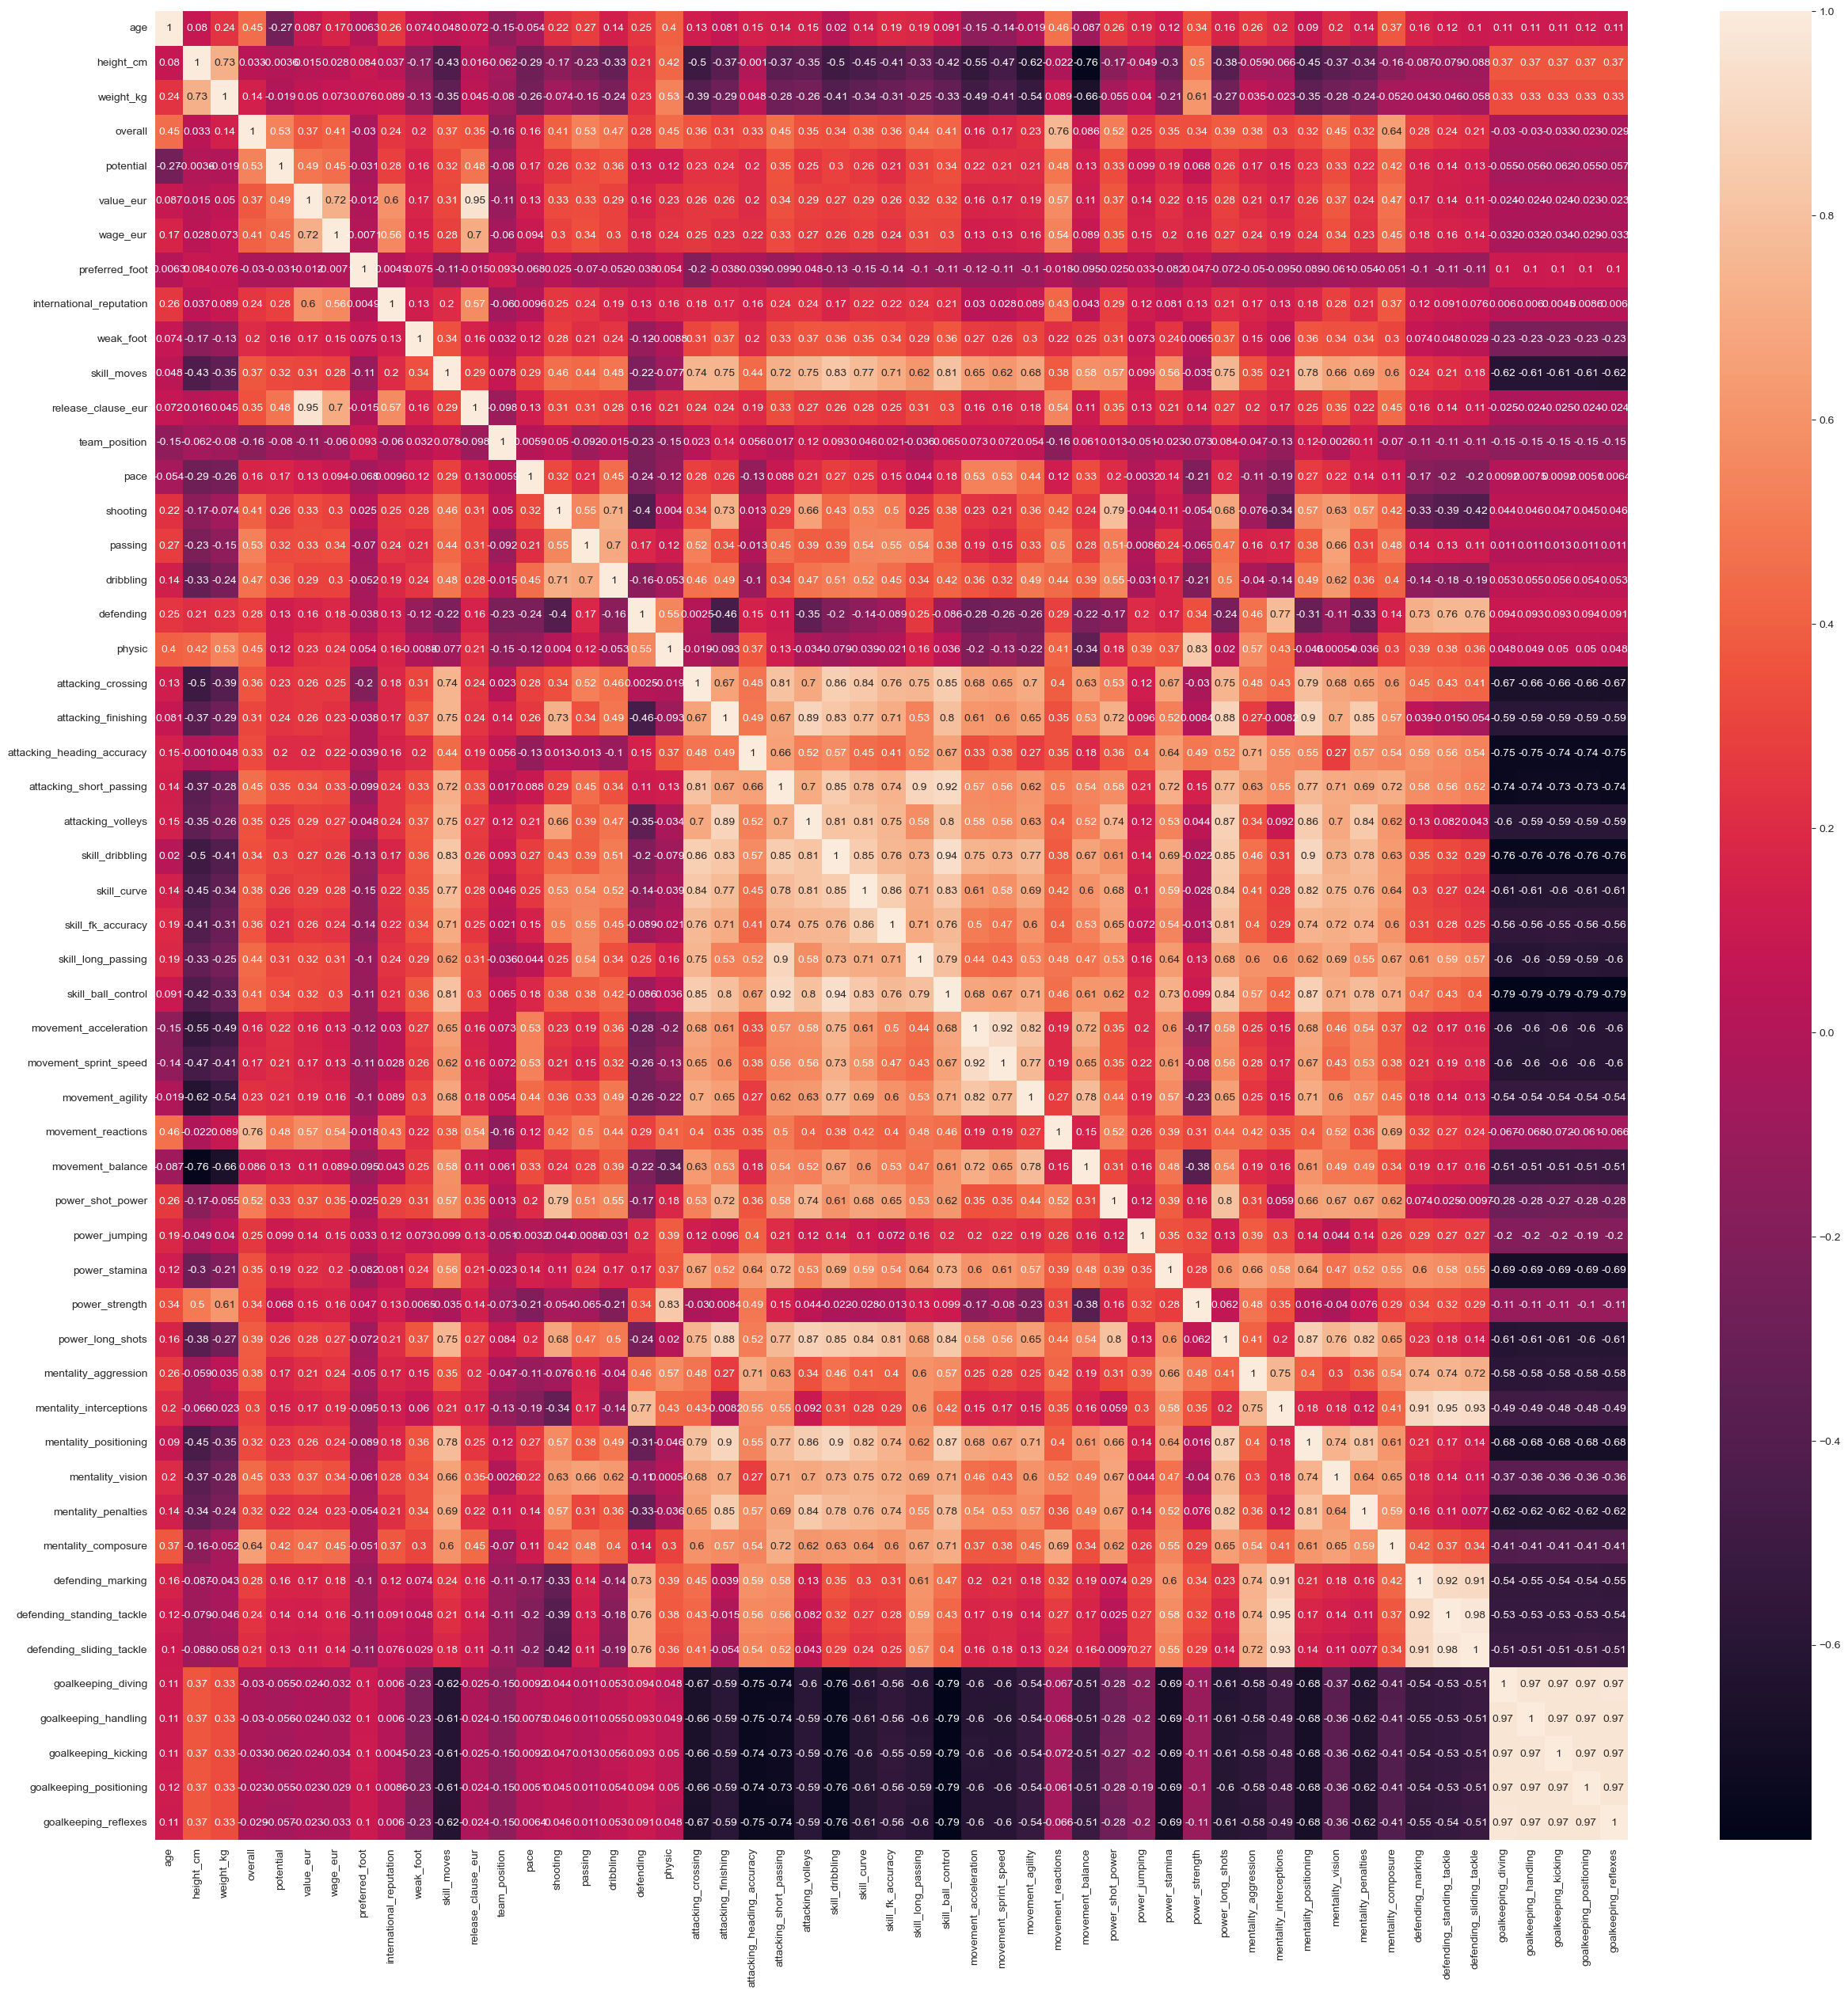

In [131]:
#Checking correlation between features
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

In [132]:
pd.set_option('display.max_row',None)
corr_data=data.corr()
corr_data=corr_data.abs().unstack()

corr_data=corr_data.sort_values(ascending=False)
corr_data=corr_data[corr_data>=0.9]
corr_data=corr_data[corr_data<1]
corr_data=pd.DataFrame(corr_data).reset_index()
corr_data.columns=['X','Y','corr']

In [133]:
print(corr_data)

                            X                          Y      corr
0   defending_standing_tackle   defending_sliding_tackle  0.975808
1    defending_sliding_tackle  defending_standing_tackle  0.975808
2        goalkeeping_reflexes         goalkeeping_diving  0.973922
3          goalkeeping_diving       goalkeeping_reflexes  0.973922
4        goalkeeping_handling         goalkeeping_diving  0.971330
5          goalkeeping_diving       goalkeeping_handling  0.971330
6        goalkeeping_handling       goalkeeping_reflexes  0.971244
7        goalkeeping_reflexes       goalkeeping_handling  0.971244
8     goalkeeping_positioning         goalkeeping_diving  0.971218
9          goalkeeping_diving    goalkeeping_positioning  0.971218
10    goalkeeping_positioning       goalkeeping_reflexes  0.971060
11       goalkeeping_reflexes    goalkeeping_positioning  0.971060
12       goalkeeping_handling    goalkeeping_positioning  0.970517
13    goalkeeping_positioning       goalkeeping_handling  0.97

In [134]:
corr_data['X'].values

array(['defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_reflexes', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_reflexes',
       'goalkeeping_positioning', 'goalkeeping_diving',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'goalkeeping_handling', 'goalkeeping_positioning',
       'goalkeeping_reflexes', 'goalkeeping_kicking',
       'goalkeeping_diving', 'goalkeeping_kicking',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_kicking', 'goalkeeping_positioning', 'value_eur',
       'release_clause_eur', 'defending_standing_tackle',
       'mentality_interceptions', 'skill_ball_control', 'skill_dribbling',
       'mentality_interceptions', 'defending_sliding_tackle',
       'movement_sprint_speed', 'movement_acceleration',
       'defending_standing_tackle', 'defending_marking',
       'attacking_short_passing', 'skill_ball_control',
       '

In [135]:
#drop highly corelated features
data.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

In [139]:
data.shape

(18278, 41)

# K-MEANS CLUSTERING

In [141]:
#Independent Variable
x=data
x.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_kicking
0,0.695652,0.064516,0.425,0.544464,0.51709,0.009589,0.016667,0,5,4,4,25,0.974359,0.507042,0.5,0.630435,0.320000,0.636364,0.943182,1.000000,0.738636,0.977011,1.000000,0.988636,1.000000,1.000000,0.929412,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,1.000000,0.800000,1.000000,0.264368,0.152174
1,0.782609,0.612903,0.700,0.544464,0.51709,0.801370,0.016667,1,5,4,5,14,0.512821,0.507042,0.5,0.630435,0.266667,0.854545,0.897727,0.989247,0.954545,0.965517,0.913978,0.852273,0.800000,0.821429,0.905882,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.858824,0.917647,0.988095,0.241379,0.152174
2,0.478261,0.225806,0.325,0.544464,0.51709,0.009589,0.016667,1,5,5,5,23,0.512821,0.943662,0.5,0.630435,0.226667,0.490909,0.931818,0.913978,0.647727,0.965517,0.989247,0.931818,0.922222,0.869048,0.964706,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.952941,0.976471,0.976190,0.298851,0.152174
3,0.434783,0.645161,0.800,0.544464,0.51709,0.009589,0.694444,1,3,3,1,5,0.512821,0.507042,0.5,0.630435,0.546667,0.636364,0.090909,0.096774,0.113636,0.114943,0.086022,0.079545,0.111111,0.380952,0.364706,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.658824,0.047059,0.666667,0.172414,0.836957
4,0.521739,0.225806,0.475,0.544464,0.51709,0.009589,0.016667,1,4,4,4,14,0.512821,0.915493,0.5,0.630435,0.266667,0.636364,0.863636,0.881720,0.636364,0.919540,0.978495,0.875000,0.833333,0.892857,0.964706,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.941176,0.952941,0.940476,0.218391,0.054348


In [142]:
from sklearn.cluster import KMeans
WCSS=[] #Create empty list
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x) # Train
    WCSS.append(kmeans.inertia_)#Total error
print(WCSS)

[1045930.2104957616, 293584.328402939, 98961.51875547423, 78085.92509855502, 66616.74799850218, 55114.43521138088, 52126.81163388382, 41630.238772582896, 39808.513095019145, 39042.2292170726]


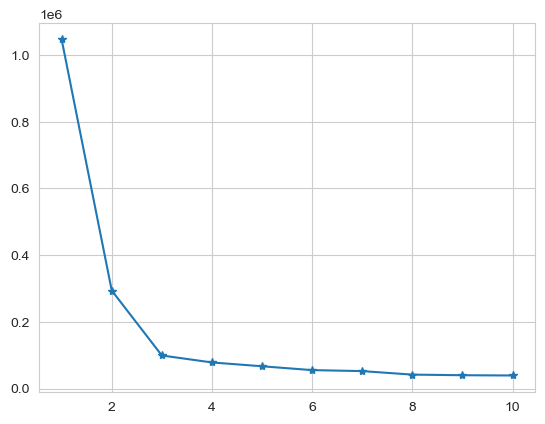

In [143]:
##sns.lineplot(x=range(1,11),y=WCSS)
plt.plot(range(1,11),WCSS,marker='*')

In [144]:
#Take value of k as 3
model=KMeans(n_clusters=3)
#Training the model
model.fit(data)

KMeans(n_clusters=3)

In [145]:
model.labels_ #predictions

array([0, 1, 2, ..., 0, 0, 0])

In [146]:
data['cluster']=pd.DataFrame(model.labels_)

In [147]:
data.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,defending_sliding_tackle,goalkeeping_kicking,cluster
0,0.695652,0.064516,0.425,0.544464,0.51709,0.009589,0.016667,0,5,4,4,25,0.974359,0.507042,0.5,0.630435,0.320000,0.636364,0.943182,1.000000,0.738636,0.977011,1.000000,0.988636,1.000000,1.000000,0.929412,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,1.000000,0.800000,1.000000,0.264368,0.152174,0
1,0.782609,0.612903,0.700,0.544464,0.51709,0.801370,0.016667,1,5,4,5,14,0.512821,0.507042,0.5,0.630435,0.266667,0.854545,0.897727,0.989247,0.954545,0.965517,0.913978,0.852273,0.800000,0.821429,0.905882,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.858824,0.917647,0.988095,0.241379,0.152174,1
2,0.478261,0.225806,0.325,0.544464,0.51709,0.009589,0.016667,1,5,5,5,23,0.512821,0.943662,0.5,0.630435,0.226667,0.490909,0.931818,0.913978,0.647727,0.965517,0.989247,0.931818,0.922222,0.869048,0.964706,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.952941,0.976471,0.976190,0.298851,0.152174,2
3,0.434783,0.645161,0.800,0.544464,0.51709,0.009589,0.694444,1,3,3,1,5,0.512821,0.507042,0.5,0.630435,0.546667,0.636364,0.090909,0.096774,0.113636,0.114943,0.086022,0.079545,0.111111,0.380952,0.364706,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.658824,0.047059,0.666667,0.172414,0.836957,1
4,0.521739,0.225806,0.475,0.544464,0.51709,0.009589,0.016667,1,4,4,4,14,0.512821,0.915493,0.5,0.630435,0.266667,0.636364,0.863636,0.881720,0.636364,0.919540,0.978495,0.875000,0.833333,0.892857,0.964706,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.941176,0.952941,0.940476,0.218391,0.054348,1


# Evaluation Metrics

In [149]:
# New variable to assign labels
label=model.labels_


In [150]:
from sklearn.metrics import silhouette_score
silh_score=silhouette_score(data,label)

In [151]:
print("Silhouette Score:",silh_score)

Silhouette Score: 0.6532255292601339


# PCA

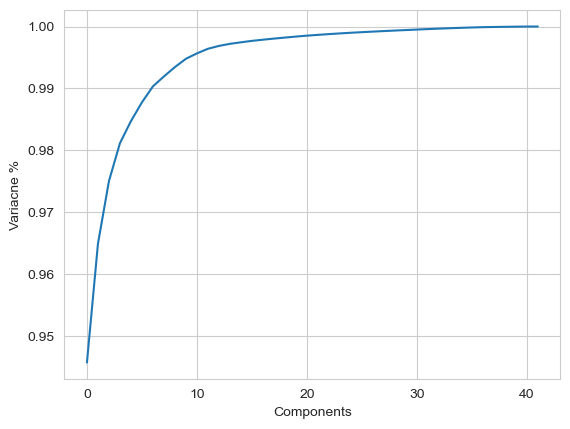

In [153]:
from sklearn.decomposition import PCA
pca=PCA()
p_components=pca.fit_transform(data)
sns.set_style('whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variacne %')
plt.show()

In [154]:
# Here 10 features explained about more than 99% of data
pca=PCA(n_components=10)
data_pca=pca.fit_transform(data)

In [155]:
pca_df=pd.DataFrame(data=data_pca,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-3.278623,2.858666,-1.053908,-0.092346,1.245258,0.424576,2.484067,2.003825,0.613247,0.951412
1,7.751260,3.470644,-0.713119,-0.093231,1.682959,1.352023,1.780970,2.285011,-0.365759,0.887518
2,-1.177341,3.944559,0.828022,-0.953309,1.117330,1.163910,2.100565,2.355067,0.109822,0.655699
3,16.779503,-1.360221,-0.908380,-0.814656,0.847540,0.891052,1.408172,0.881657,0.357010,0.090254
4,7.751056,2.724325,-0.604396,-0.344474,0.836386,1.079000,1.382526,1.555347,0.336091,0.868236


In [156]:
x_data=pca_df
x_data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-3.278623,2.858666,-1.053908,-0.092346,1.245258,0.424576,2.484067,2.003825,0.613247,0.951412
1,7.751260,3.470644,-0.713119,-0.093231,1.682959,1.352023,1.780970,2.285011,-0.365759,0.887518
2,-1.177341,3.944559,0.828022,-0.953309,1.117330,1.163910,2.100565,2.355067,0.109822,0.655699
3,16.779503,-1.360221,-0.908380,-0.814656,0.847540,0.891052,1.408172,0.881657,0.357010,0.090254
4,7.751056,2.724325,-0.604396,-0.344474,0.836386,1.079000,1.382526,1.555347,0.336091,0.868236


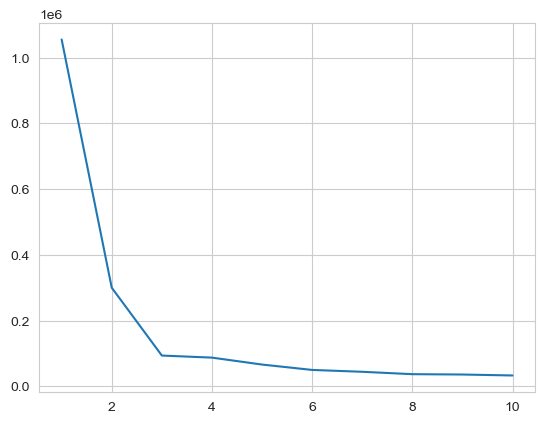

In [157]:
from sklearn.cluster import KMeans
kmeans=KMeans()
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans=kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)


In [158]:
#Here also number of optimal cluster is 3
kmeans=KMeans(n_clusters=3,random_state=45)
kmeans.fit(x_data)

KMeans(n_clusters=3, random_state=45)

In [159]:
labels_pca=kmeans.labels_
print (kmeans.labels_)

[2 1 0 ... 2 2 2]


In [160]:
silh_score=silhouette_score(x_data,labels_pca)
print("Silhouette score:",silh_score)

Silhouette score: 0.6678056482311596


In [161]:
kmeans=KMeans(n_clusters=5,random_state=45)
kmeans.fit(x_data)

KMeans(n_clusters=5, random_state=45)

In [162]:
labels_pca=kmeans.labels_
print (kmeans.labels_)

[2 3 0 ... 4 4 4]


In [163]:
silh_score1=silhouette_score(x_data,labels_pca)
print("Silhouette score:",silh_score1)

Silhouette score: 0.38825836213634757


# Here, 3 clusters gives silhouette score of 0.66
# 5 clusters gives silhouette score of 0.38
# So, 3 clusters are the optimal clusters
# After PCA there slight increase in the silhoutte score 